In [41]:
#Importando libs essenciais
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import BatchNormalization
from keras.layers  import Dropout
from keras.preprocessing.image import ImageDataGenerator

In [42]:
#Seperando dados para treinamentos
seed = 10
np.random.seed(seed)
(X_treinamento, y_treinamento),(X_teste, y_teste) =  cifar10.load_data()

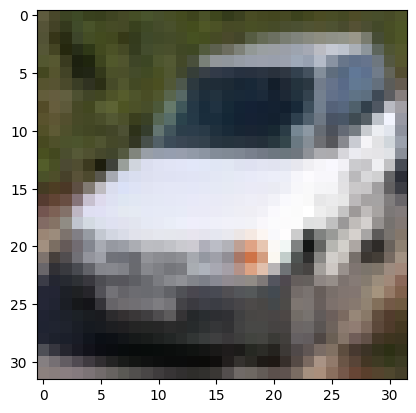

In [43]:
#Mostrando imagem
plt.imshow(X_treinamento[46])

In [44]:
#Convertendo imagens
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 32, 32, 3)
previsores_teste = X_teste.reshape(X_teste.shape[0], 32, 32, 3)
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

In [45]:
#Tratando dados de pixels para uma escala de 0-1
previsores_treinamento /= 255
previsores_teste /= 255

In [46]:
#Convertendo classes
classe_treinamento = to_categorical(y_treinamento, 10)
classe_teste = to_categorical(y_teste, 10)

In [67]:
# Augumentation
gerador_treinamento = ImageDataGenerator(rotation_range=7,
                                         horizontal_flip= True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range=0.2)

gerador_teste = ImageDataGenerator()

base_treinamento = gerador_treinamento.flow(previsores_treinamento, classe_treinamento, batch_size= 128)
base_teste = gerador_teste.flow(previsores_teste, classe_teste, batch_size= 128)

In [70]:
print(base_treinamento.x.shape)
print(base_treinamento.batch_size)
print(base_teste.y.shape)

(50000, 32, 32, 3)
128
(10000, 10)


In [53]:
#Iniciar rede covulacional
def criarRede():
  classificador = Sequential()
  classificador.add(Conv2D(32, (4,4), input_shape=(32,32,3),
                          activation = "relu")) #Criação do mapa de características
  classificador.add(BatchNormalization()) #Normalização dos dados
  classificador.add(MaxPooling2D(pool_size=(2,2))) #Realização do MaxPooling para pegar as principais características


  classificador.add(Conv2D(32, (3,3),strides=2, activation = "relu")) #Criação do mapa de características
  classificador.add(BatchNormalization()) #Normalização dos dados
  classificador.add(MaxPooling2D(pool_size=(2,2))) #Realização do MaxPooling para pegar as principais características


  classificador.add(Flatten()) #Normalizar para uma entrada comum na rede neural densa
  classificador.add(Dense(units=128, activation = "relu" ))
  classificador.add(Dropout(0.2))
  classificador.add(Dense(units=128, activation = "relu" ))
  classificador.add(Dropout(0.2))
  classificador.add(Dense(units=10, activation = "softmax" ))
  classificador.compile(loss = 'categorical_crossentropy',
                        optimizer = 'adam', metrics = ['accuracy'])
  return classificador

In [54]:
classificador = criarRede()

In [60]:
#Validação cruzada
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)

resultados = []

for index_treinamento, index_teste in kfold.split(previsores_treinamento, np.zeros(shape = (classe_treinamento.shape[0], 1))):
  classificador.fit(previsores_treinamento[index_treinamento], classe_treinamento[index_treinamento],
                    batch_size= 128, epochs = 15)
  precisao = classificador.evaluate(previsores_treinamento[index_teste], classe_treinamento[index_teste])
  resultados.append(precisao[1])

Epoch 1/15
313/313 [==============================] - 20s 65ms/step - loss: 0.3798 - accuracy: 0.8648
Epoch 2/15
313/313 [==============================] - 20s 65ms/step - loss: 0.3718 - accuracy: 0.8666
Epoch 3/15
313/313 [==============================] - 20s 64ms/step - loss: 0.3689 - accuracy: 0.8691
Epoch 4/15
313/313 [==============================] - 20s 65ms/step - loss: 0.3602 - accuracy: 0.8724
Epoch 5/15
313/313 [==============================] - 20s 65ms/step - loss: 0.3613 - accuracy: 0.8716
Epoch 6/15
313/313 [==============================] - 20s 65ms/step - loss: 0.3596 - accuracy: 0.8709
Epoch 7/15
313/313 [==============================] - 20s 65ms/step - loss: 0.3520 - accuracy: 0.8742
Epoch 8/15
313/313 [==============================] - 20s 65ms/step - loss: 0.3539 - accuracy: 0.8748
Epoch 9/15
313/313 [==============================] - 20s 64ms/step - loss: 0.3542 - accuracy: 0.8724
Epoch 10/15
313/313 [==============================] - 20s 65ms/step - loss: 0.350

In [66]:
mediaCross  = sum(resultados)/len(resultados)
print(mediaCross)

0.8218199968338012
